# Stochastic block model in R

## GDrive files

[1] "h:/My Drive/COMEXT/comext_graph_analysis/notebooks"

[1] "h:/My Drive/COMEXT"

In [2]:
# R.version.string
# # installed.packages()
# # install.packages("googledrive")
# library("googledrive")
# # drive_auth(
# #   email = gargle::gargle_oauth_email(),
# #   path = NULL,
# #   scopes = "https://www.googleapis.com/auth/drive",
# #   cache = gargle::gargle_oauth_cache(),
# #   use_oob = gargle::gargle_oob_default(),
# #   token = NULL
# # )
# # Check if is running in Colab and redefine is_interactive()
# if (file.exists("/usr/local/lib/python3.7/dist-packages/google/colab/_ipython.py")) {
#   install.packages("R.utils")
#   library("R.utils")
#   library("httr")
#   my_check <- function() {return(TRUE)}
#   reassignInPackage("is_interactive", pkgName = "httr", my_check) 
#   options(rlang_interactive=TRUE)
# }
# drive_auth(use_oob = TRUE, cache = TRUE, path = "./")

# Gexf

In [48]:
testit <- function(x = sort(runif(20)), ...)
{
    pb <- txtProgressBar(...)
    for(i in c(0, x, 1)) {Sys.sleep(0.5); setTxtProgressBar(pb, i)}
    Sys.sleep(1)
    close(pb)
}
testit()
testit(runif(10))
testit(style = 3)
testit(char=' \u27a4')

In [56]:
getwd()
setwd("h:/My Drive/COMEXT")
getwd()
library(future,quietly=TRUE) # allows parralel processing in greed()
library(Matrix,quietly=TRUE) # sparse matrix
library(ggplot2,quietly=TRUE) # ploting and data 
library(greed,quietly=TRUE)
library(igraph,quietly=TRUE)
library(dplyr,quietly=TRUE)
library(ggpubr,quietly=TRUE)
library(rgexf)
# set.seed(2134)
future::plan("multisession", workers=5) # may be increased 
thresh = read.csv("data-samples/manual/complete_thresholds.csv",row.names="X")
files <- list.files("data-samples/graphs/complete")
pb = txtProgressBar(min = 0, max = length(files), initial = 0) 
for (f in files){
    name <- paste("data-samples/graphs/complete/",f,sep="")
    x <- unlist(strsplit(f,"_"))
    y <- substr(x[2],2,5)
    p <- substr(x[3],2,3)
    g <- read.gexf(name)
    g_ig <- gexf.to.igraph(g)
    bin_mat <- as(as.matrix((as_adj(g_ig,attr="weight") >= thresh[p,paste("X",y,sep="")])),"dgCMatrix")
    sol <- greed(bin_mat,model=Sbm(alpha=1,a0=1,b0=1,type="directed"),verbose=FALSE)
    v <- V(g_ig)$name
    c <- clustering(sol)
    s <- c("country,block")
    for (i in 1:length(v)){
        s <- c(s,paste(v[i],c[i],sep=","))
    }
    f_o <- unlist(strsplit(f,"."))
    out_name <- paste("data-samples/manual/metrics/sbm/",f_o[1],".csv",sep="")
    fileConn <- file(out_name)
    writeLines(s, fileConn)
    close(fileConn)
    setTxtProgressBar(pb,1)
}



── Fitting a directed SBM model ──



ℹ Initializing a population of 20 solutions.

ℹ Generation 1 : best solution with an ICL of -12374 and 18 clusters.

ℹ Generation 2 : best solution with an ICL of -12042 and 16 clusters.

ℹ Generation 3 : best solution with an ICL of -11990 and 19 clusters.

ℹ Generation 4 : best solution with an ICL of -11925 and 20 clusters.

ℹ Generation 5 : best solution with an ICL of -11925 and 20 clusters.

── Final clustering ──



── Clustering with a SBM model 19 clusters and an ICL of -11908 



── Fitting a directed SBM model ──



ℹ Initializing a population of 20 solutions.

ℹ Generation 1 : best solution with an ICL of -8280 and 15 clusters.

ℹ Generation 2 : best solution with an ICL of -8110 and 15 clusters.

ℹ Generation 3 : best solution with an ICL of -8053 and 17 clusters.

ℹ Generation 4 : best solution with an ICL of -8015 and 17 clusters.



: 

: 

In [55]:
name <- paste("data-samples/graphs/complete/",f,sep="")
x <- unlist(strsplit(f,"_"))
y <- substr(x[2],2,5)
p <- substr(x[3],2,3)
g <- read.gexf(name)
g_ig <- gexf.to.igraph(g)
t <- thresh[p,paste("X",y,sep="")]
bin_mat <- as(as.matrix((as_adj(g_ig,attr="weight") >= t)),"dgCMatrix")
sol <- greed(bin_mat,model=Sbm(alpha=1,a0=1,b0=1,type="directed"),verbose=FALSE)
v <- V(g_ig)$name
c <- clustering(sol)
s <- c("country,block")
for (i in 1:length(v)){
    s <- c(s,paste(v[i],c[i],sep=","))
}
f_o <- unlist(strsplit(f,"[.]"))
out_name <- paste("data-samples/manual/metrics/sbm/",f_o[1],".csv",sep="")
fileConn<-file(out_name)
writeLines(s, fileConn)
close(fileConn)



── Fitting a directed SBM model ──



ℹ Initializing a population of 20 solutions.

ℹ Generation 1 : best solution with an ICL of -12291 and 16 clusters.

ℹ Generation 2 : best solution with an ICL of -12025 and 18 clusters.

ℹ Generation 3 : best solution with an ICL of -11947 and 22 clusters.

ℹ Generation 4 : best solution with an ICL of -11925 and 21 clusters.

ℹ Generation 5 : best solution with an ICL of -11923 and 22 clusters.

ℹ Generation 6 : best solution with an ICL of -11921 and 22 clusters.

ℹ Generation 7 : best solution with an ICL of -11919 and 22 clusters.

ℹ Generation 8 : best solution with an ICL of -11919 and 22 clusters.

── Final clustering ──



── Clustering with a SBM model 21 clusters and an ICL of -11897 



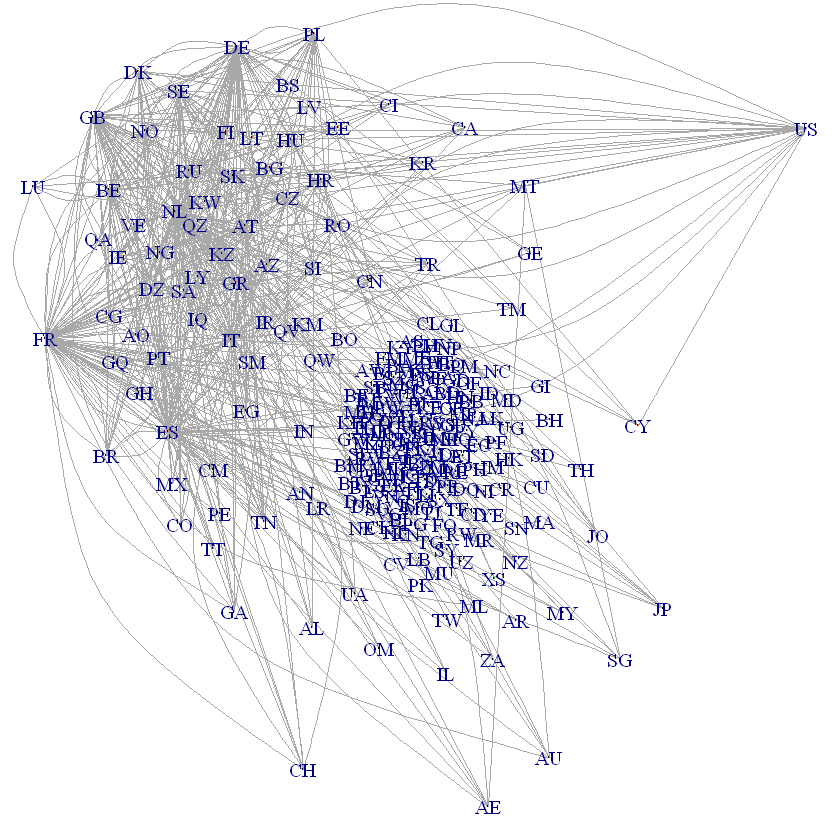

In [4]:
op <- par(mai = rep(0, 4)) # For extra space
plot(full_ig)
par(op)

# SBM

In [6]:
# install.packages("greed")
# install.packages("ggpubr")
# install.packages("rgexf")

In [6]:
class(full_ig)

[1] "igraph"

In [35]:
as_adj(full_ig,attr="weight")

   [[ suppressing 240 column names 'AD', 'AE', 'AF' ... ]]



240 x 240 sparse Matrix of class "dgCMatrix"
                                                                         
AD . .            . . . .            .    .          .     .            .
AE . .            . . . .            .    .          .     .            .
AF . .            . . . .            .    .          .     .            .
AG . .            . . . .            .    .          .     .            .
AI . .            . . . .            .    .          .     .            .
AL . .            . . . .            .    .          .     .            .
AM . .            . . . .            .    .          .     .            .
AN . .            . . . .            .    .          .     .            .
AO . .            . . . .            .    .          .     .            .
AR . .            . . . .            .    .          .     .            .
AS . .            . . . .            .    .          .     .            .
AT . .            . . . .            .    .          .     .       

In [36]:
class(bin_mat)

[1] "dgCMatrix"
attr(,"package")
[1] "Matrix"

In [7]:
bin_mat <- as(as.matrix((as_adj(full_ig,attr="weight") > 100)),"dgCMatrix")
sol <- greed(bin_mat,model=Sbm(alpha=0.5,a0=1,b0=1,type="directed"))



── Fitting a directed SBM model ──



ℹ Initializing a population of 20 solutions.

ℹ Generation 1 : best solution with an ICL of -1515 and 6 clusters.

ℹ Generation 2 : best solution with an ICL of -1508 and 8 clusters.

ℹ Generation 3 : best solution with an ICL of -1505 and 7 clusters.

ℹ Generation 4 : best solution with an ICL of -1505 and 7 clusters.

── Final clustering ──



── Clustering with a SBM model 7 clusters and an ICL of -1505 



In [55]:
V(full_ig)

+ 240/240 vertices, named, from e1fe558:
  [1] AD AE AF AG AI AL AM AN AO AR AS AT AU AW AZ BA BB BD BE BF BG BH BI BJ BL
 [26] BM BN BO BQ BR BS BT BW BY BZ CA CD CF CG CH CI CK CL CM CN CO CR CU CV CW
 [51] CY CZ DE DJ DK DM DO DZ EC EE EG EH ER ES ET FI FJ FK FM FO FR GA GB GD GE
 [76] GF GH GI GL GM GN GP GQ GR GT GU GW GY HK HN HR HT HU ID IE IL IM IN IQ IR
[101] IS IT JM JO JP KE KG KH KI KM KN KP KR KW KY KZ LA LB LC LI LK LR LS LT LU
[126] LV LY MA MC MD ME MF MG MH MK ML MM MN MO MP MQ MR MS MT MU MV MW MX MY MZ
[151] NA NC NE NG NI NL NO NP NR NU NZ OM PA PE PF PG PH PK PL PM PR PS PT PW PY
[176] QA QV QW QZ RE RO RS RU RW SA SB SC SD SE SG SH SI SK SL SM SN SO SR SS ST
[201] SV SX SY SZ TC TD TF TG TH TJ TK TL TM TN TO TR TT TV TW TZ UA UG US UY UZ
[226] VA VC VE VG VI VN VU WF WS XS YE YT ZA ZM ZW

In [38]:
clustering(sol)

[1] 7 7 7 7 7 4 7 7 5 7 7 2 7 7 5 7 7 7 2 7 3 7 7 7 7 7 7 7 7 4 7 7 7 7 7 4 7
 [38] 7 4 4 4 7 7 4 7 4 7 7 7 7 7 3 1 7 2 7 7 5 7 3 5 7 7 1 7 3 7 7 7 7 1 4 1 7
 [75] 7 7 4 7 7 7 7 7 5 2 7 7 7 7 7 7 3 7 3 7 3 7 7 7 5 5 7 1 7 7 4 7 7 7 7 7 7
[112] 7 4 4 7 5 7 7 7 7 7 7 7 3 4 3 5 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 4 7 7 7 4
[149] 7 7 7 7 7 5 7 1 5 7 7 7 7 7 7 7 7 7 7 7 3 7 7 7 2 7 7 4 4 4 7 7 3 7 6 7 5
[186] 7 7 7 2 7 7 3 3 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 4 5 7 4 4 7 7 7 7 7
[223] 4 7 7 7 7 5 7 7 7 7 7 7 7 7 7 7 7 7

In [57]:
install.packages("ggraph")

Installing package into 'C:/Users/PietroDomi/AppData/Local/R/win-library/4.2'
(as 'lib' is unspecified)

also installing the dependencies 'tweenr', 'polyclip', 'ggforce', 'viridis', 'tidygraph', 'graphlayouts'




package 'tweenr' successfully unpacked and MD5 sums checked
package 'polyclip' successfully unpacked and MD5 sums checked
package 'ggforce' successfully unpacked and MD5 sums checked
package 'viridis' successfully unpacked and MD5 sums checked
package 'tidygraph' successfully unpacked and MD5 sums checked
package 'graphlayouts' successfully unpacked and MD5 sums checked
package 'ggraph' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\PietroDomi\AppData\Local\Temp\RtmpE3318D\downloaded_packages


NULL

In [65]:
??full_ig

starting httpd help server ...
 done



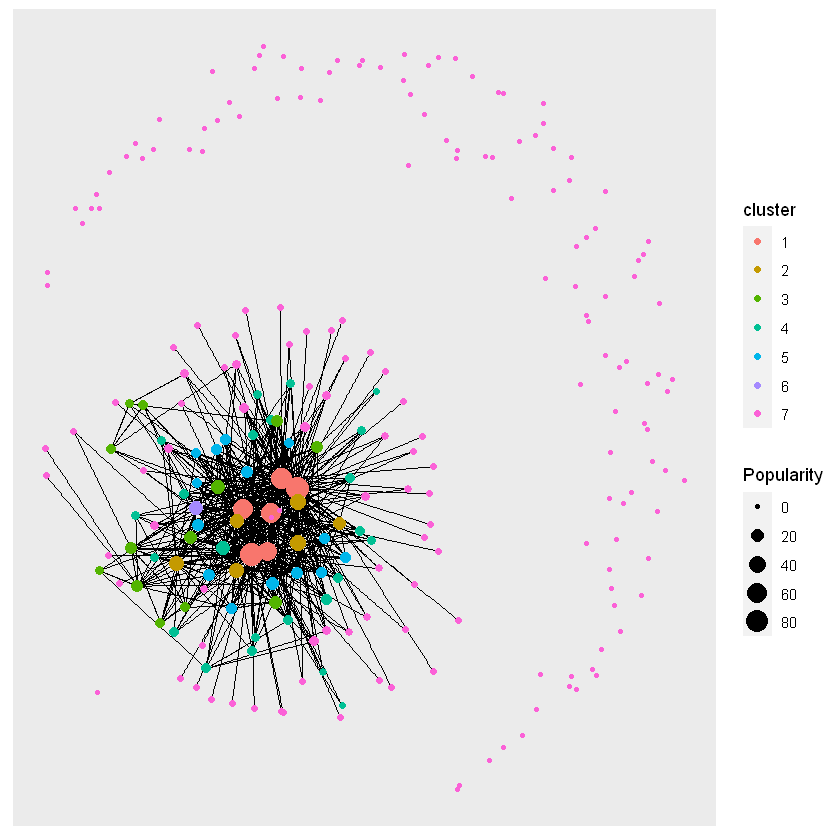

In [66]:
library(ggraph)
library(tidygraph)
library(igraph)

graph <- igraph::graph_from_adjacency_matrix(as_adj(full_ig)) %>% as_tbl_graph() %>% 
    mutate(Popularity = centrality_degree())  %>% 
    activate(nodes) %>%
    mutate(cluster=factor(clustering(sol),1:K(sol)))

# plot using ggraph
ggraph(graph, layout = 'kk') + 
    geom_edge_link() + 
    geom_node_point(aes(size = Popularity,color=cluster))

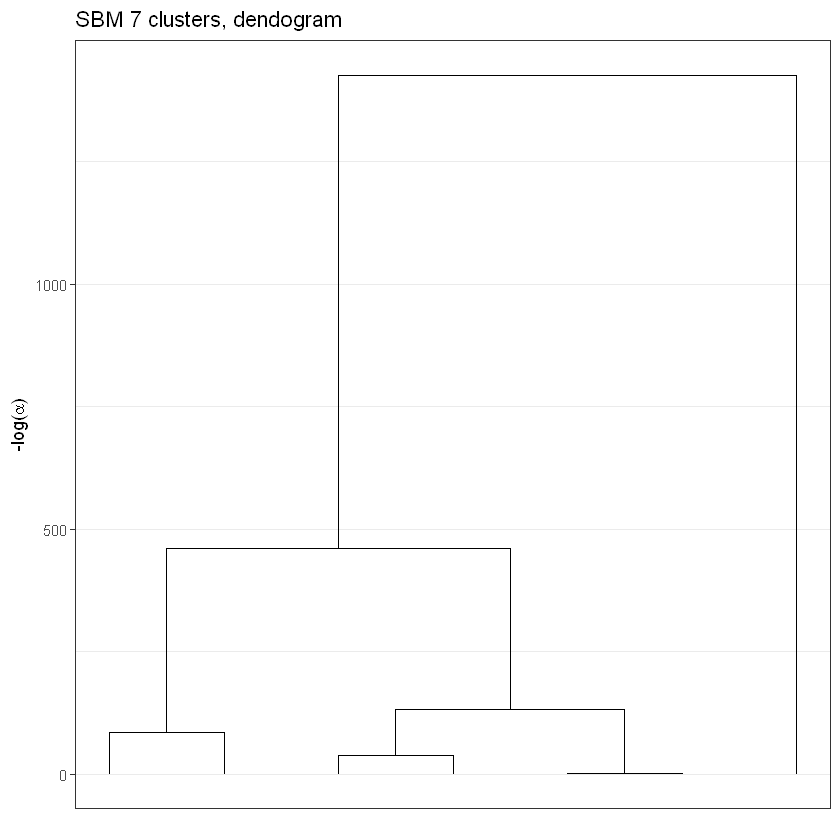

In [39]:
plot(sol)

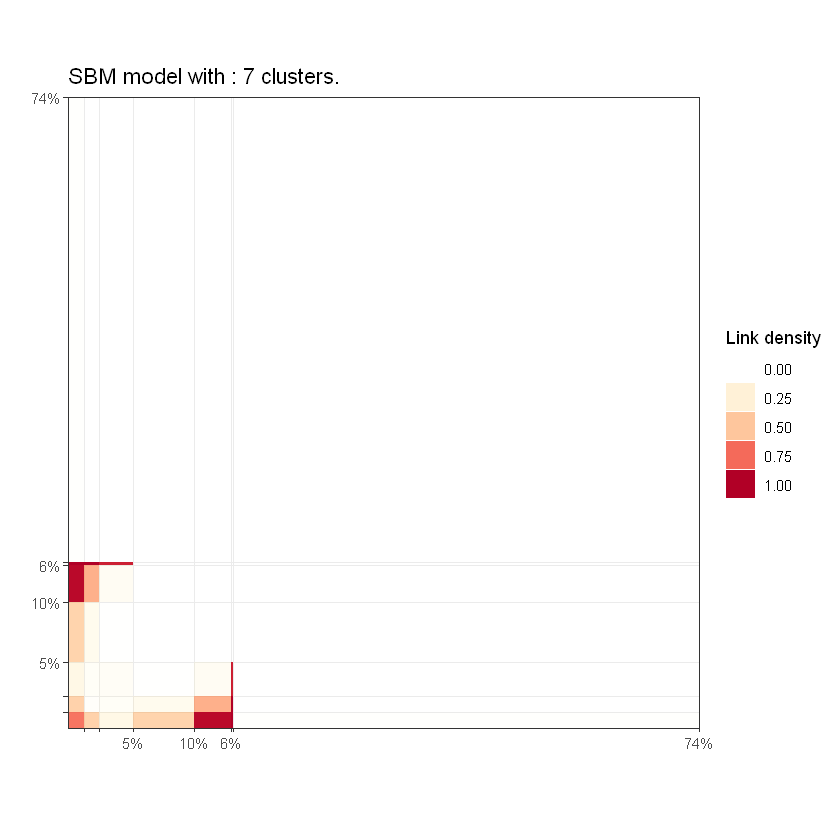

In [40]:
plot(sol,type="blocks")

Warning message:
"Removed 6 rows containing missing values (geom_curve)."


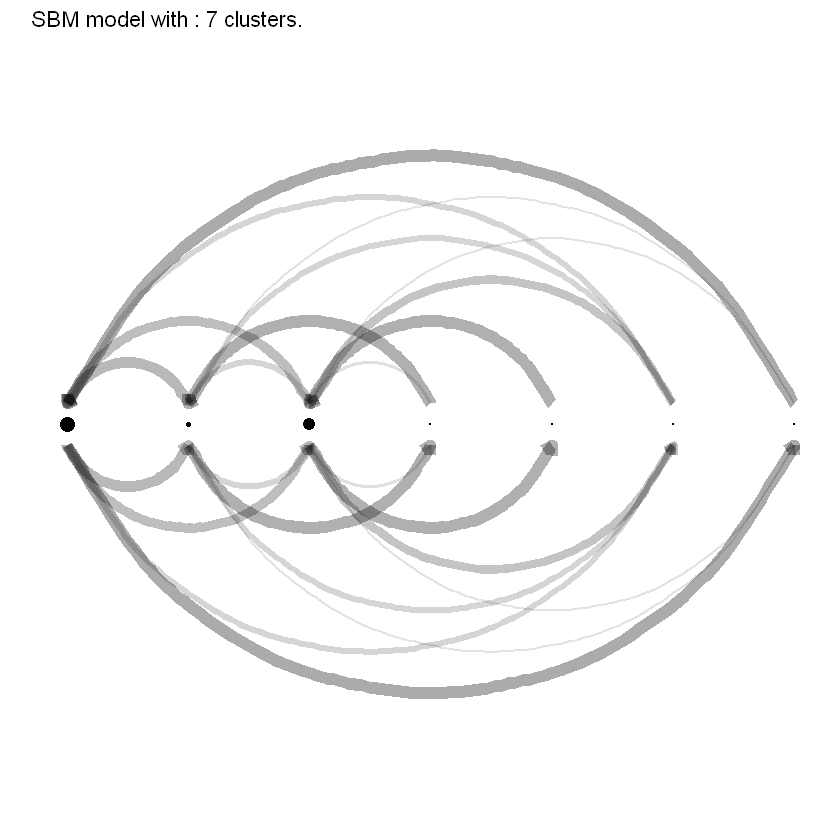

In [41]:
plot(sol,type="nodelink")

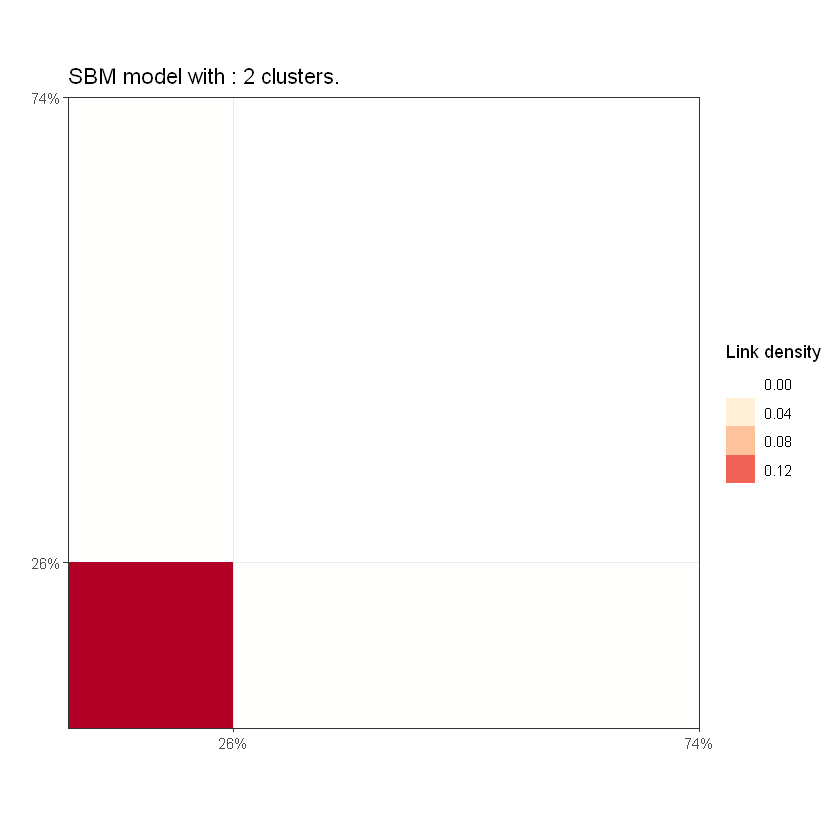

In [42]:
sol2 = cut(sol,2)
plot(sol2,type='blocks')

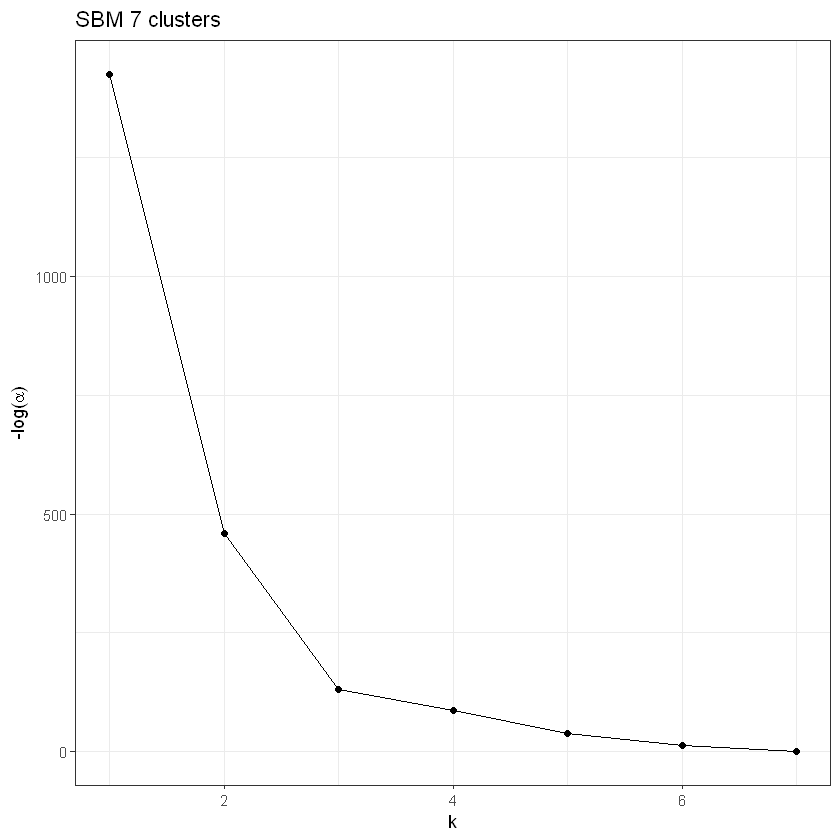

In [43]:
plot(sol,type='path')

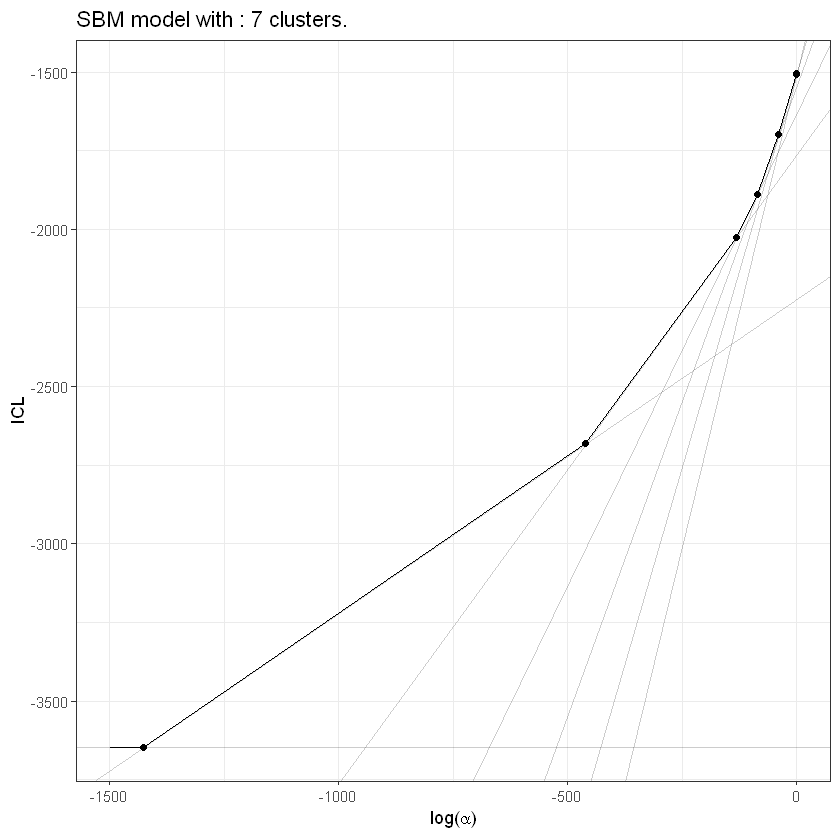

In [44]:
plot(sol,type='front')

# DcSBM

In [45]:
sol_dcsbm <- greed(bin_mat,model = DcSbm())



── Fitting a guess DCSBM model ──



ℹ Initializing a population of 20 solutions.

ℹ Generation 1 : best solution with an ICL of -1008 and 3 clusters.

ℹ Generation 2 : best solution with an ICL of -1008 and 3 clusters.

ℹ Generation 3 : best solution with an ICL of -1008 and 3 clusters.

── Final clustering ──



── Clustering with a DCSBM model 3 clusters and an ICL of -1008 



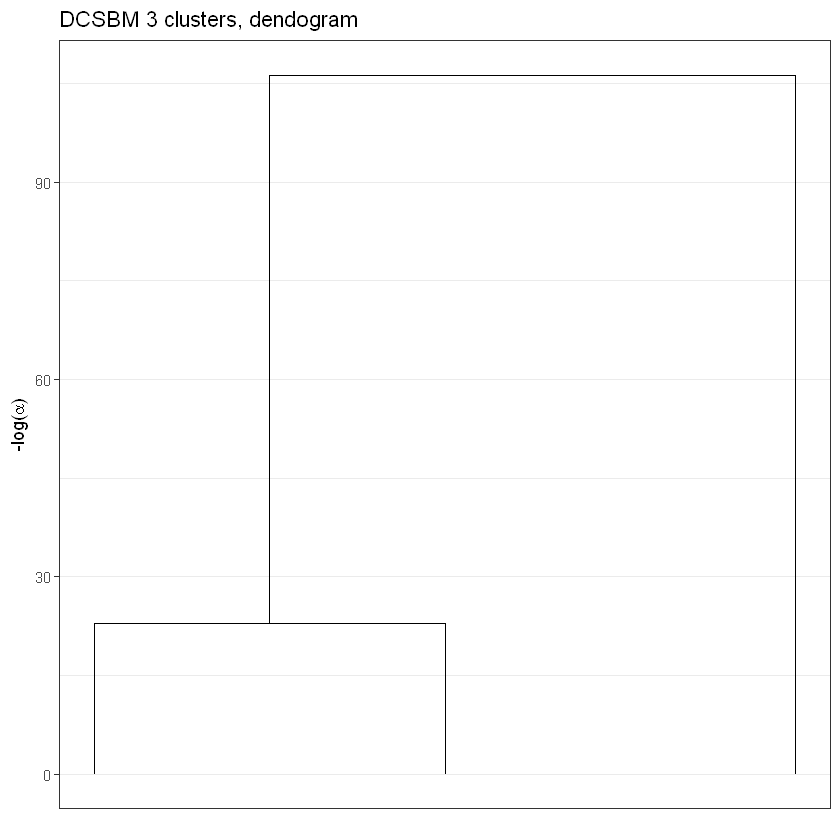

In [46]:
plot(sol_dcsbm)

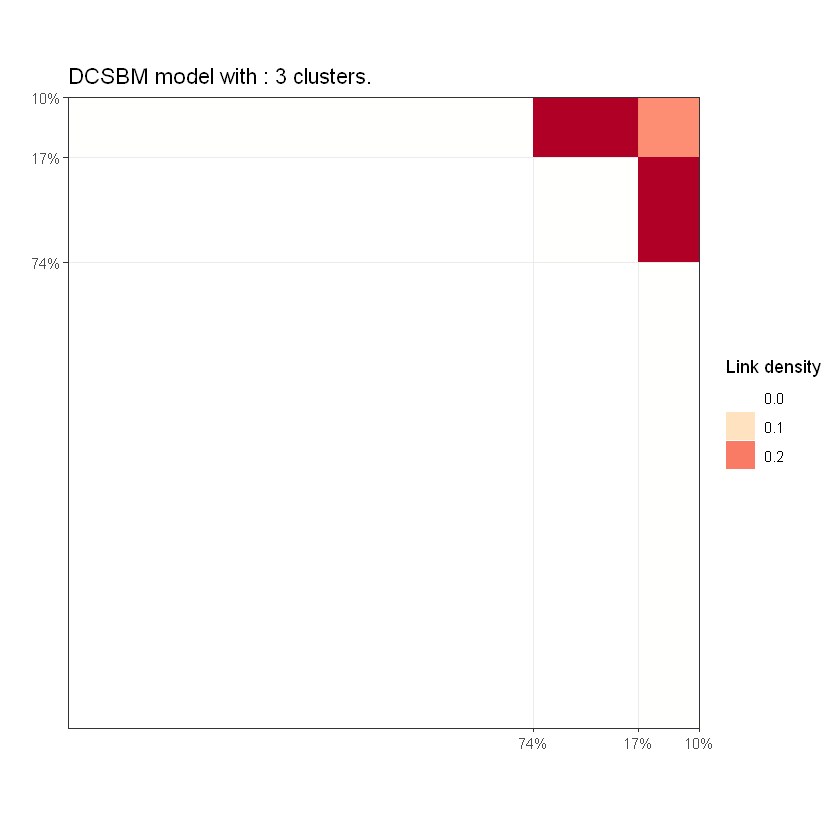

In [47]:
plot(sol_dcsbm,type="blocks")

Warning message:
"Removed 2 rows containing missing values (geom_curve)."


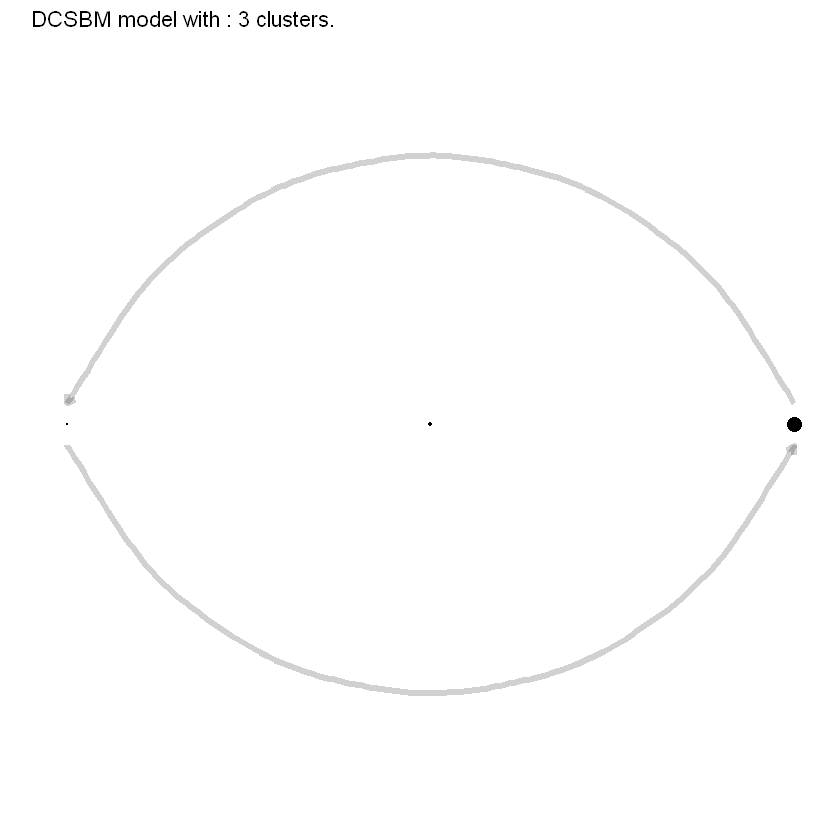

In [48]:
plot(sol_dcsbm,type="nodelink")

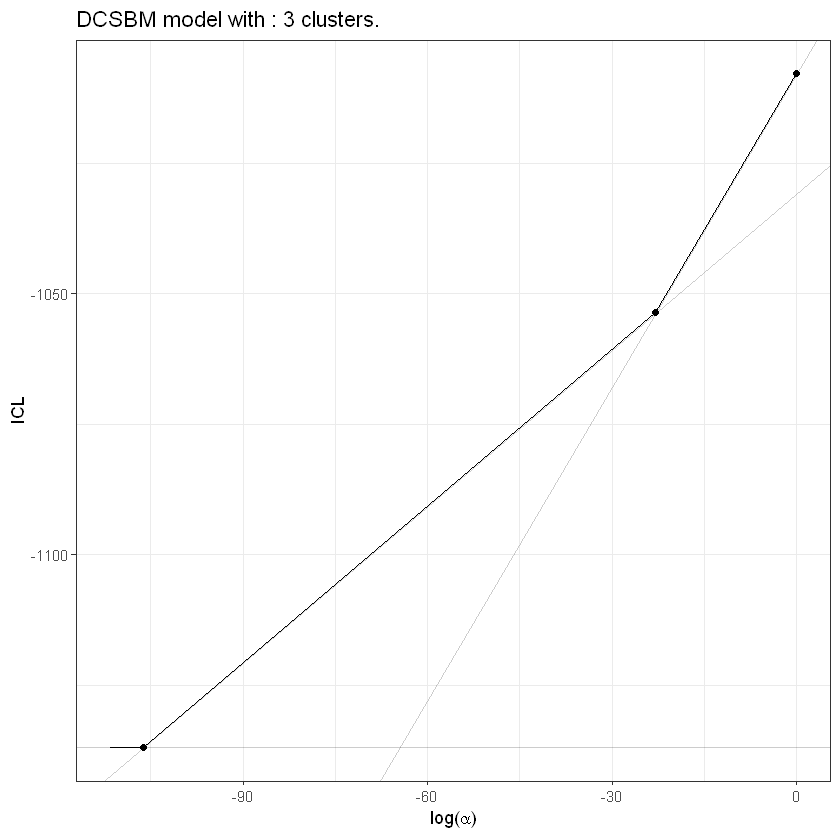

In [49]:
plot(sol_dcsbm,type="front")

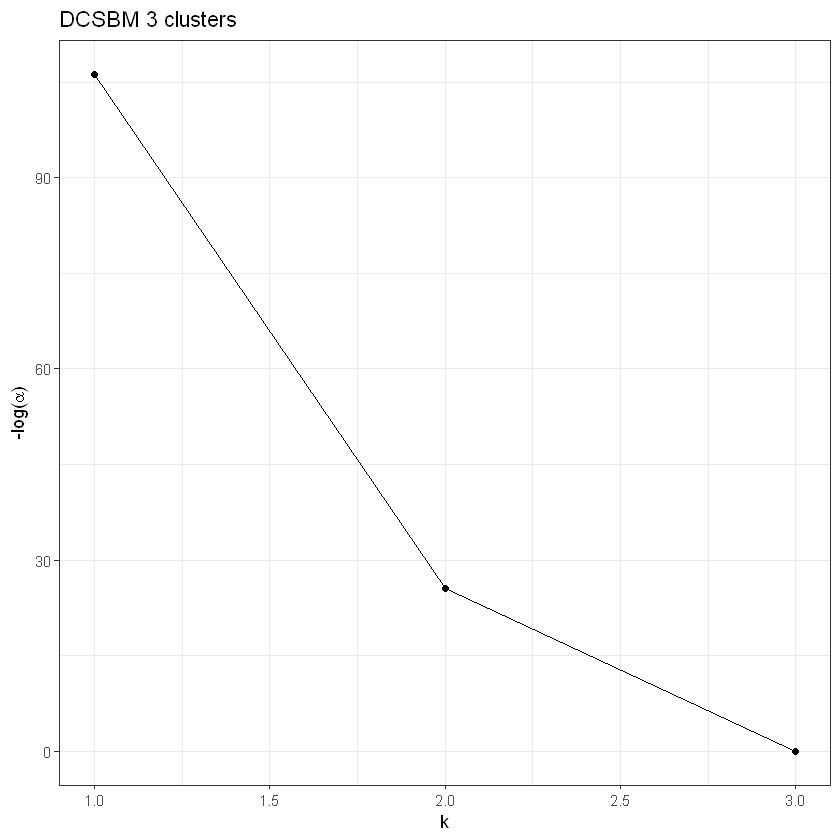

In [50]:
plot(sol_dcsbm,type="path")